In [55]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [56]:
df = pd.read_csv("/content/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [57]:
df.shape

(1460, 81)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [59]:
data = df.loc[:, ["BsmtFullBath", "BsmtHalfBath","FullBath", "HalfBath", "BedroomAbvGr", "SalePrice"]]
data.head()

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,SalePrice
0,1,0,2,1,3,208500
1,0,1,2,0,3,181500
2,1,0,2,1,3,223500
3,1,0,1,0,3,140000
4,1,0,2,1,4,250000


In [60]:
#Converting Object dtype(string dtype) to
data["BsmtFullBath"] = data["BsmtFullBath"].astype(float)
data["BsmtHalfBath"] = data["BsmtHalfBath"].astype(float)
data["FullBath"] = data["FullBath"].astype(float)
data["HalfBath"] = data["HalfBath"].astype(float)
data["BedroomAbvGr"] = data["BedroomAbvGr"].astype(float)
data["SalePrice"] = data["SalePrice"].astype(float)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BsmtFullBath  1460 non-null   float64
 1   BsmtHalfBath  1460 non-null   float64
 2   FullBath      1460 non-null   float64
 3   HalfBath      1460 non-null   float64
 4   BedroomAbvGr  1460 non-null   float64
 5   SalePrice     1460 non-null   float64
dtypes: float64(6)
memory usage: 68.6 KB


In [62]:
data.isnull().sum()

BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
SalePrice       0
dtype: int64

In [63]:
df1 = pd.read_csv("/content/test.csv")

In [64]:
tdata = df1.loc[:, ["BsmtFullBath", "BsmtHalfBath","FullBath", "HalfBath", "BedroomAbvGr"]]
tdata.head()

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr
0,0.0,0.0,1,0,2
1,0.0,0.0,1,1,3
2,0.0,0.0,2,1,3
3,0.0,0.0,2,1,3
4,0.0,0.0,2,0,2


In [65]:
tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BsmtFullBath  1457 non-null   float64
 1   BsmtHalfBath  1457 non-null   float64
 2   FullBath      1459 non-null   int64  
 3   HalfBath      1459 non-null   int64  
 4   BedroomAbvGr  1459 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 57.1 KB


In [66]:
tdata["BsmtFullBath"] = tdata["BsmtFullBath"].astype(float)
tdata["BsmtHalfBath"] = tdata["BsmtHalfBath"].astype(float)
tdata["FullBath"] = tdata["FullBath"].astype(float)
tdata["HalfBath"] = tdata["HalfBath"].astype(float)
tdata["BedroomAbvGr"] = tdata["BedroomAbvGr"].astype(float)

In [67]:
tensor_tdata = tf.constant(tdata)
tensor_tdata = tf.cast(tensor_tdata, tf.float32)
print(tensor_tdata)

tf.Tensor(
[[0. 0. 1. 0. 2.]
 [0. 0. 1. 1. 3.]
 [0. 0. 2. 1. 3.]
 ...
 [1. 0. 1. 0. 4.]
 [0. 1. 1. 0. 3.]
 [0. 0. 2. 1. 3.]], shape=(1459, 5), dtype=float32)


In [68]:
tensor_tdata = tf.random.shuffle(tensor_tdata)
print(tensor_tdata[:5])

tf.Tensor(
[[1. 0. 2. 1. 3.]
 [1. 0. 1. 0. 3.]
 [1. 0. 1. 1. 1.]
 [0. 1. 1. 0. 3.]
 [0. 0. 2. 1. 3.]], shape=(5, 5), dtype=float32)


In [69]:
Xt = tensor_tdata[:]
print(Xt.shape)
print(len(Xt))

(1459, 5)
1459


In [70]:
TEST_DATASET_SIZE = len(Xt)
X_testing = Xt
print(X_testing.shape)

(1459, 5)


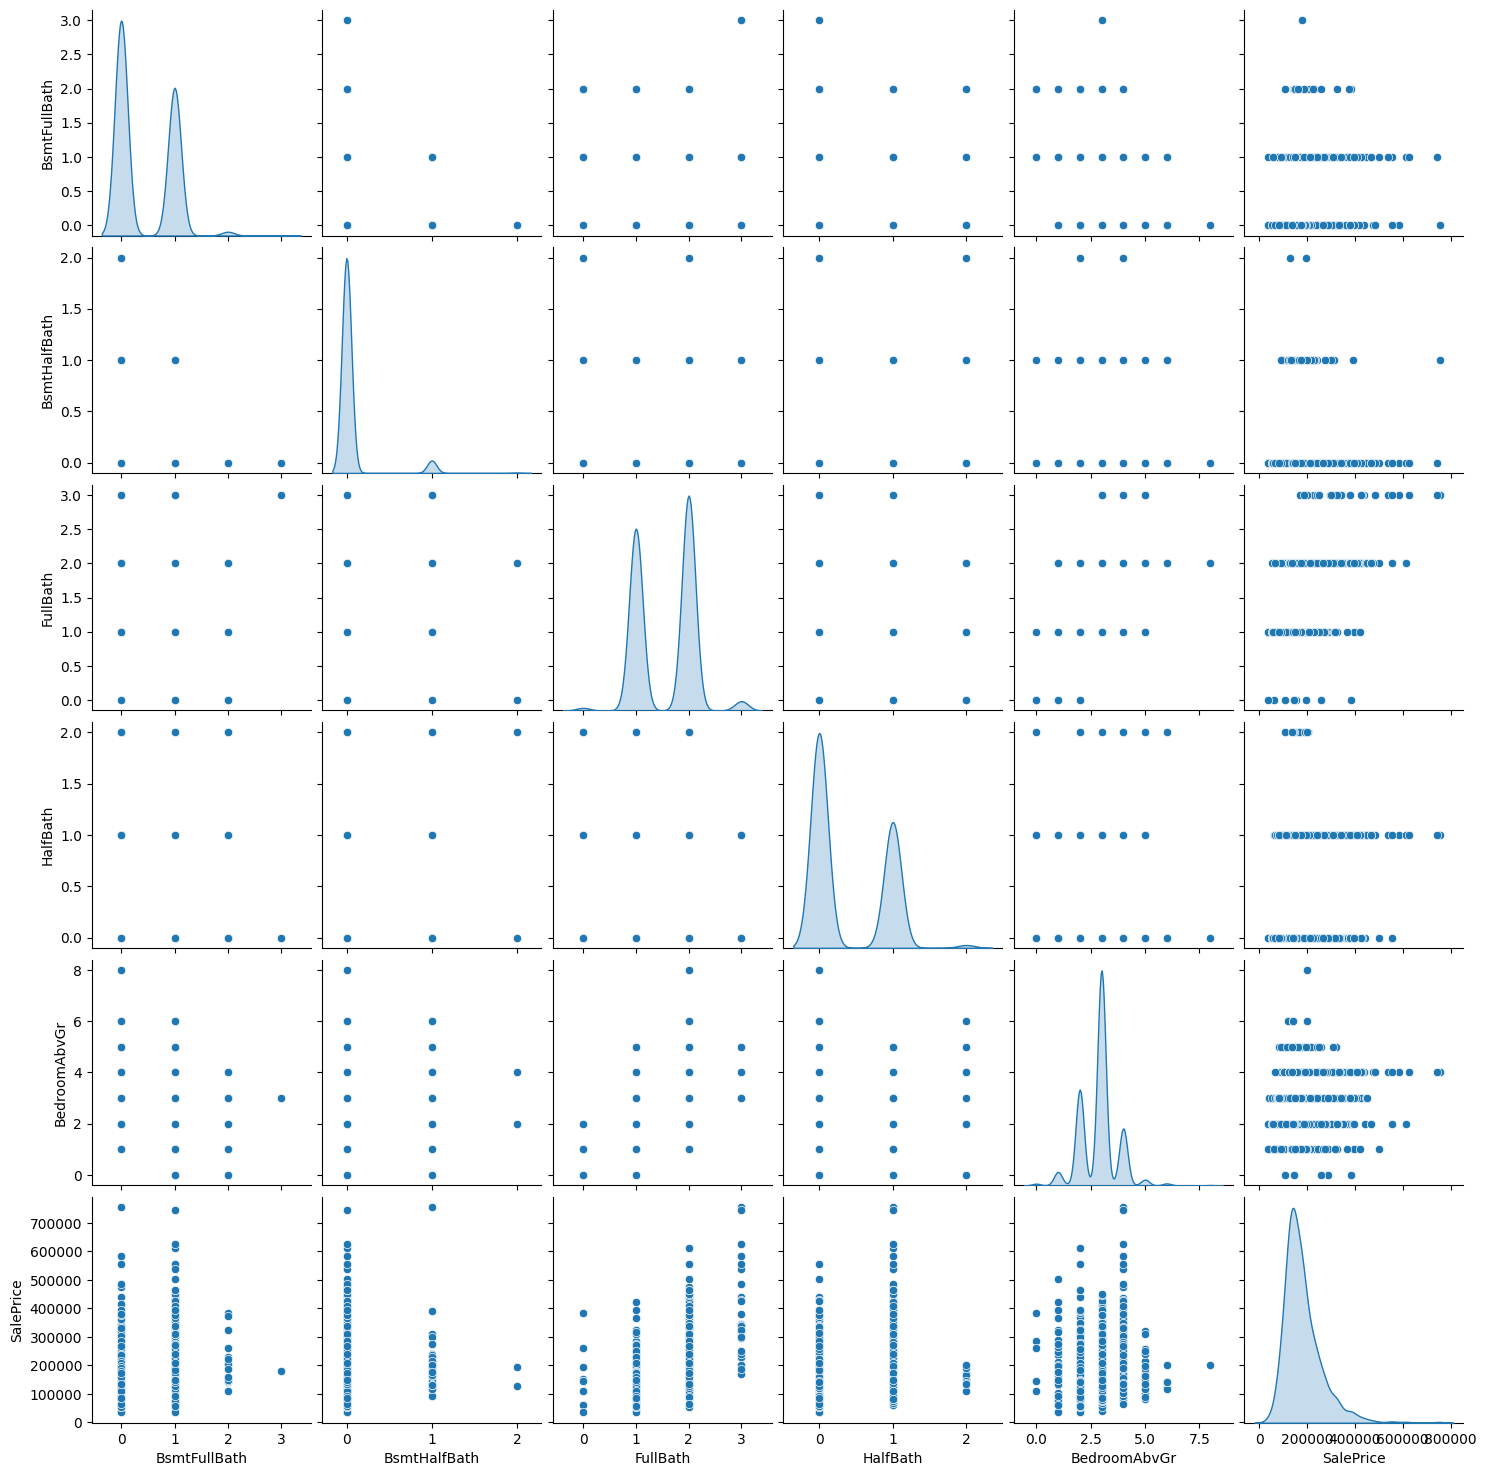

In [71]:
sns.pairplot(data[["BsmtFullBath", "BsmtHalfBath","FullBath", "HalfBath", "BedroomAbvGr", "SalePrice"]],  diag_kind='kde')

In [72]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data, tf.float32)
print(tensor_data)

tf.Tensor(
[[1.00000e+00 0.00000e+00 2.00000e+00 1.00000e+00 3.00000e+00 2.08500e+05]
 [0.00000e+00 1.00000e+00 2.00000e+00 0.00000e+00 3.00000e+00 1.81500e+05]
 [1.00000e+00 0.00000e+00 2.00000e+00 1.00000e+00 3.00000e+00 2.23500e+05]
 ...
 [0.00000e+00 0.00000e+00 2.00000e+00 0.00000e+00 4.00000e+00 2.66500e+05]
 [1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 2.00000e+00 1.42125e+05]
 [1.00000e+00 0.00000e+00 1.00000e+00 1.00000e+00 3.00000e+00 1.47500e+05]], shape=(1460, 6), dtype=float32)


In [73]:
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 2.00000e+00 1.07000e+05]
 [0.00000e+00 0.00000e+00 2.00000e+00 1.00000e+00 3.00000e+00 1.87000e+05]
 [0.00000e+00 0.00000e+00 1.00000e+00 1.00000e+00 3.00000e+00 1.34000e+05]
 [1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 3.00000e+00 1.60000e+05]
 [0.00000e+00 0.00000e+00 2.00000e+00 1.00000e+00 4.00000e+00 3.61919e+05]], shape=(5, 6), dtype=float32)


In [74]:
X = tensor_data[: , :-1]
print(X.shape)

(1460, 5)


In [75]:
y = tensor_data[:,-1]
y = tf.expand_dims(y, axis = -1)
print(y.shape)

(1460, 1)


**Normalization** = ((current element) - (mean)) / (standard deviation)

In [76]:
#normalizer = Normalization(axis = -1)
#normalizer.adapt(X)
#normalizer(X)

In [77]:
print(X.shape)

(1460, 5)


**SPLITTING DATA**

In [78]:
TRAIN_RATIO = 0.8
VALIDATION_RATIO = 0.2
DATASET_SIZE = len(X)
#X_train, y_train, X_validation, y_validation = train_test_split(X, y, test_size = 0.2, random_state = 42)

**TRAINING DATA**

In [79]:
X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(X_train.shape)
print(y_train.shape)

(1168, 5)
(1168, 1)


In [80]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [81]:
#for x,y in train_dataset:
 # print(x,y)
  #break

**VALIDATION BLOCK**

In [82]:
X_validation = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VALIDATION_RATIO))]
y_validation = y[int(DATASET_SIZE*TRAIN_RATIO): int(DATASET_SIZE*(TRAIN_RATIO+VALIDATION_RATIO))]
print(X_validation.shape)
print(y_validation.shape)

(292, 5)
(292, 1)


In [83]:
X_validation = X[int(DATASET_SIZE*TRAIN_RATIO):]
y_validation = y[int(DATASET_SIZE*TRAIN_RATIO):]
print(X_validation.shape)
print(y_validation.shape)

(292, 5)
(292, 1)


In [84]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_validation, y_validation))
val_dataset = train_dataset.shuffle(buffer_size=5, reshuffle_each_iteration = True).batch(32, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

In [85]:
y_testing = y[:-1]
print(y_testing.shape)

(1459, 1)


In [86]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_testing,y_testing))
test_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [87]:
normalizer = Normalization()
normalizer.adapt(X_train)
normalizer(X_train)[:5]

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[ 1.1117266 , -0.25096875, -1.039511  , -0.75356925, -1.0688391 ],
       [-0.80346006, -0.25096875,  0.7862764 ,  1.2287933 ,  0.14085415],
       [-0.80346006, -0.25096875, -1.039511  ,  1.2287933 ,  0.14085415],
       [ 1.1117266 , -0.25096875, -1.039511  , -0.75356925,  0.14085415],
       [-0.80346006, -0.25096875,  0.7862764 ,  1.2287933 ,  1.3505474 ]],
      dtype=float32)>

**Model Creation Using Tensorflow**

In [88]:
model = tf.keras.Sequential([
    InputLayer(input_shape = (5,),),
    normalizer,
    Dense(128, activation = "relu"),
    Dense(128, activation = "relu"),
    Dense(128, activation = "relu"),
    Dense(1)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 5)                 11        
 tion)                                                           
                                                                 
 dense_4 (Dense)             (None, 128)               768       
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 33932 (132.55 KB)
Trainable params: 33921 (132.50 KB)
Non-trainable params: 11 (48.00 Byte)
______________

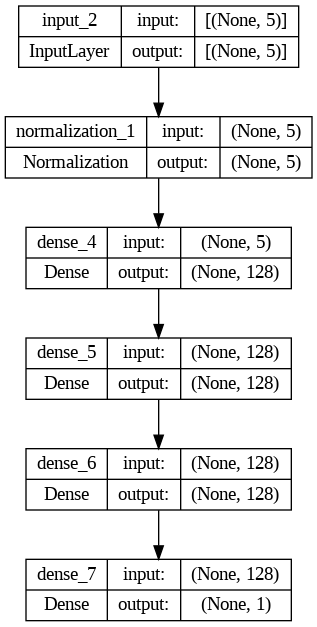

In [89]:
tf.keras.utils.plot_model(model, to_file ="model.png", show_shapes =True)

**Error sanctioning : how representative is our model of our datast**

In [90]:
model.compile(optimizer = Adam(learning_rate=0.1),
              loss = MeanAbsoluteError(),
              metrics = RootMeanSquaredError())

In [91]:
history = model.fit(train_dataset, validation_data = val_dataset, epochs = 100, verbose=1)

Epoch 1/100
37/37 [==============================] - 1s 8ms/step - loss: 80953.6641 - root_mean_squared_error: 112979.0391 - val_loss: 43132.6953 - val_root_mean_squared_error: 64131.6484
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 44704.7461 - root_mean_squared_error: 65109.4883 - val_loss: 42924.8203 - val_root_mean_squared_error: 66354.5156
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 46451.8359 - root_mean_squared_error: 67567.8359 - val_loss: 41008.7734 - val_root_mean_squared_error: 61448.7227
Epoch 4/100
37/37 [==============================] - 0s 3ms/step - loss: 45550.1680 - root_mean_squared_error: 65784.1328 - val_loss: 45929.6016 - val_root_mean_squared_error: 62343.7422
Epoch 5/100
37/37 [==============================] - 0s 3ms/step - loss: 43795.5547 - root_mean_squared_error: 63717.5547 - val_loss: 45632.9766 - val_root_mean_squared_error: 62327.0781
Epoch 6/100
37/37 [==============================] - 0s 4ms/step

In [92]:
history.history

{'loss': [80953.6640625,
  44704.74609375,
  46451.8359375,
  45550.16796875,
  43795.5546875,
  46430.1484375,
  43592.38671875,
  42354.92578125,
  43274.0234375,
  43454.859375,
  45424.6796875,
  42269.03125,
  43555.828125,
  43101.45703125,
  42899.00390625,
  43722.8203125,
  42141.53515625,
  42717.12890625,
  41110.0,
  40109.7109375,
  39539.76953125,
  40882.73828125,
  40453.55859375,
  39615.9140625,
  39770.16796875,
  40291.78515625,
  41344.2421875,
  38653.57421875,
  39904.015625,
  38690.71875,
  39519.34765625,
  38789.11328125,
  40103.0703125,
  37778.625,
  40151.33203125,
  37756.640625,
  41340.984375,
  39320.23828125,
  38690.203125,
  38309.96484375,
  39097.91015625,
  38452.05078125,
  39717.390625,
  38105.79296875,
  38498.34765625,
  37878.51953125,
  38759.77734375,
  38795.7734375,
  38613.68359375,
  38831.45703125,
  40849.2421875,
  40568.8359375,
  41765.15625,
  39525.16796875,
  39514.27734375,
  39656.19921875,
  38130.328125,
  38023.32421875,

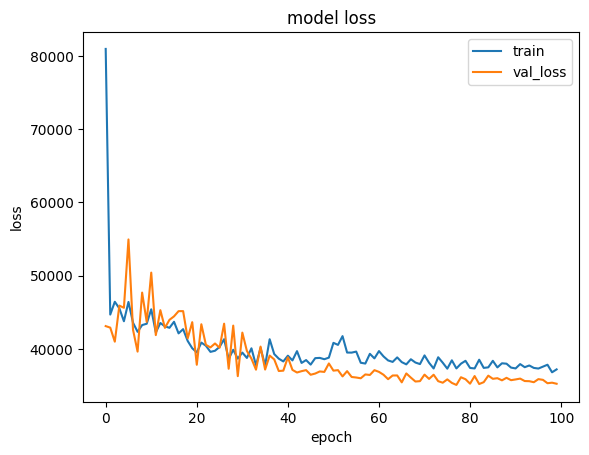

In [93]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])
plt.show()

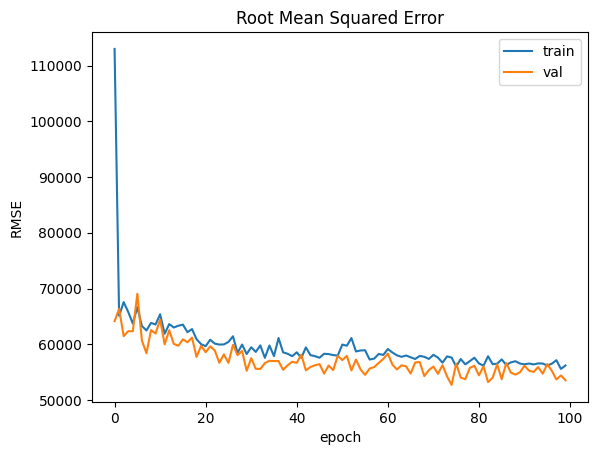

In [94]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Root Mean Squared Error')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [95]:
model.evaluate(X_testing,y_testing)

46/46 [==============================] - 0s 2ms/step - loss: nan - root_mean_squared_error: nan


[nan, nan]

In [96]:
X_testing.shape

TensorShape([1459, 5])

In [97]:
model.predict(tf.expand_dims(X_testing[0], axis = 0))

1/1 [==============================] - 0s 63ms/step


array([[236528.88]], dtype=float32)

In [98]:
y_testing[0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([107000.], dtype=float32)>

In [99]:
model.predict(X_testing)

46/46 [==============================] - 0s 2ms/step


array([[236528.86],
       [140773.88],
       [211909.98],
       ...,
       [133452.06],
       [243736.92],
       [145072.89]], dtype=float32)

In [100]:
y_true = list(y_testing[:,0].numpy())

In [101]:
y_pred = list(model.predict(X_testing)[:,0])
print(y_pred)

46/46 [==============================] - 0s 1ms/step
[236528.86, 140773.88, 211909.98, 131313.45, 191398.61, 164719.48, 183567.17, 191398.61, 226201.88, 191398.61, 140773.88, 115422.76, 140773.88, 140773.88, 183567.17, 102982.85, 226201.88, 131313.45, 191398.61, 115422.76, 226201.88, 265112.94, 138501.39, 221303.89, 170000.56, 115422.76, 183567.17, 183567.17, 171114.89, 145072.88, 140773.89, 215320.11, 115422.76, 215320.1, 145072.88, 226201.88, 183567.17, 115422.76, 133452.06, 102982.85, 112250.484, 112250.484, 183567.17, 155594.81, 133452.06, 102982.85, 115422.76, 191052.73, 191398.61, 236528.86, 109758.0, 138501.39, 236528.86, 145072.88, 215320.1, 140773.88, 236528.86, 191398.61, 243736.92, 164719.48, 236528.86, 145072.88, 191398.61, 215320.11, 215320.1, 145072.88, 236528.86, 110432.96, 133452.06, 183567.17, 140773.88, 260814.16, 329800.97, 183567.17, 265112.94, 183567.17, 140773.88, 191398.61, 183567.17, 102982.85, 191398.61, 131313.45, 131313.45, 191398.61, 164719.48, 137977.38, 13

In [102]:
ind = np.arange(1459)
plt.figure(figsize=(240,120))

width = 0.3

plt.bar(ind, y_pred, width, label='Predicted house price')
plt.bar(ind + width, y_true, width, label='Actual house price')

plt.xlabel('Actual VS Predicted house price')
plt.ylabel('House Price Prices')
plt.title('Actual VS Predicted house price')
plt.legend()
plt.show()